## Import Library

In [1]:
# common lib
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# scikit learn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ignore warnings 
import warnings
warnings.filterwarnings("ignore")

#savign model
import pickle
import json

## Data Loading

In [2]:
# read data from excel
df = pd.read_excel('datasets/aria_data.xlsx')
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [3]:
# cek data tail
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


In [4]:
# chcek information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


In [5]:
# cehck describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,160.0,4.733750,0.214050,4.130000,4.600000,4.720000,4.890000,5.260000
v1,160.0,389.892437,148.673511,227.285714,268.608333,295.162500,536.409375,678.375000
v2,160.0,237.442677,70.128690,178.800000,194.029018,204.187500,244.716667,422.812500
v3,160.0,480.573041,118.798984,348.933333,384.419643,414.383929,591.611404,722.312500
v4,160.0,394.109622,63.060442,313.733333,353.181250,370.741667,424.131250,558.500000
v5,160.0,487.316520,100.941711,373.333333,418.583333,456.031250,496.475000,721.000000
v6,160.0,251.450820,59.634652,189.200000,213.000000,226.062500,262.531250,415.375000
v7,160.0,714.737926,51.148098,586.266667,678.385417,718.833333,751.446875,853.466667
v8,160.0,4456.913233,335.035933,3725.666667,4273.437500,4554.766667,4700.612500,5086.375000


## Exploratory Data Analysis (EDA)

In [6]:
#Copy data untuk handling selanjutnya agar data awal aman
data = df.copy()

In [7]:
# pembagian data berdasarkan lab
data_lab1 = data[data['sample_type'] == 'lab 1']
data_lab2 = data[data['sample_type'] == 'lab 2']
data_lab2.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
100,4.79,526.466667,192.866667,575.933333,379.333333,488.600000,218.400000,658.066667,4377.333333,lab 2
101,4.93,504.357143,211.285714,626.642857,436.785714,502.071429,214.857143,806.857143,4836.571429,lab 2
102,5.03,529.437500,210.875000,585.375000,373.937500,476.500000,218.562500,596.062500,4458.500000,lab 2
103,4.72,541.875000,209.500000,589.250000,374.687500,490.500000,216.875000,638.750000,4467.875000,lab 2
104,4.77,537.533333,207.733333,577.466667,365.666667,492.066667,218.333333,646.333333,4274.333333,lab 2


### Proporsi data

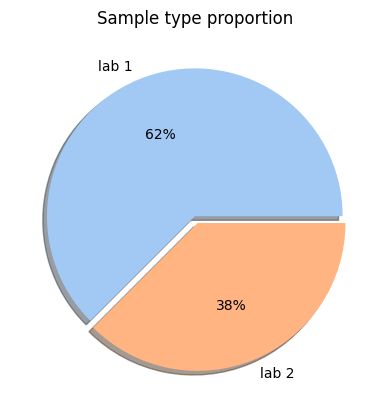

In [8]:
# plotting data on chart
plt.pie(data=data ,x=data.sample_type.value_counts(),labels=data.sample_type.unique(), autopct='%.0f%%', explode = [0, 0.05], shadow=True, colors=sns.color_palette('pastel'))
plt.title('Sample type proportion')
plt.show()

Data yang dikumpulkan mayoritas adalah data dari tipe lab 1 dengan 62% dan lab 2 dengan 38%

### Analisa Pola Distribusi Variabel dan Target

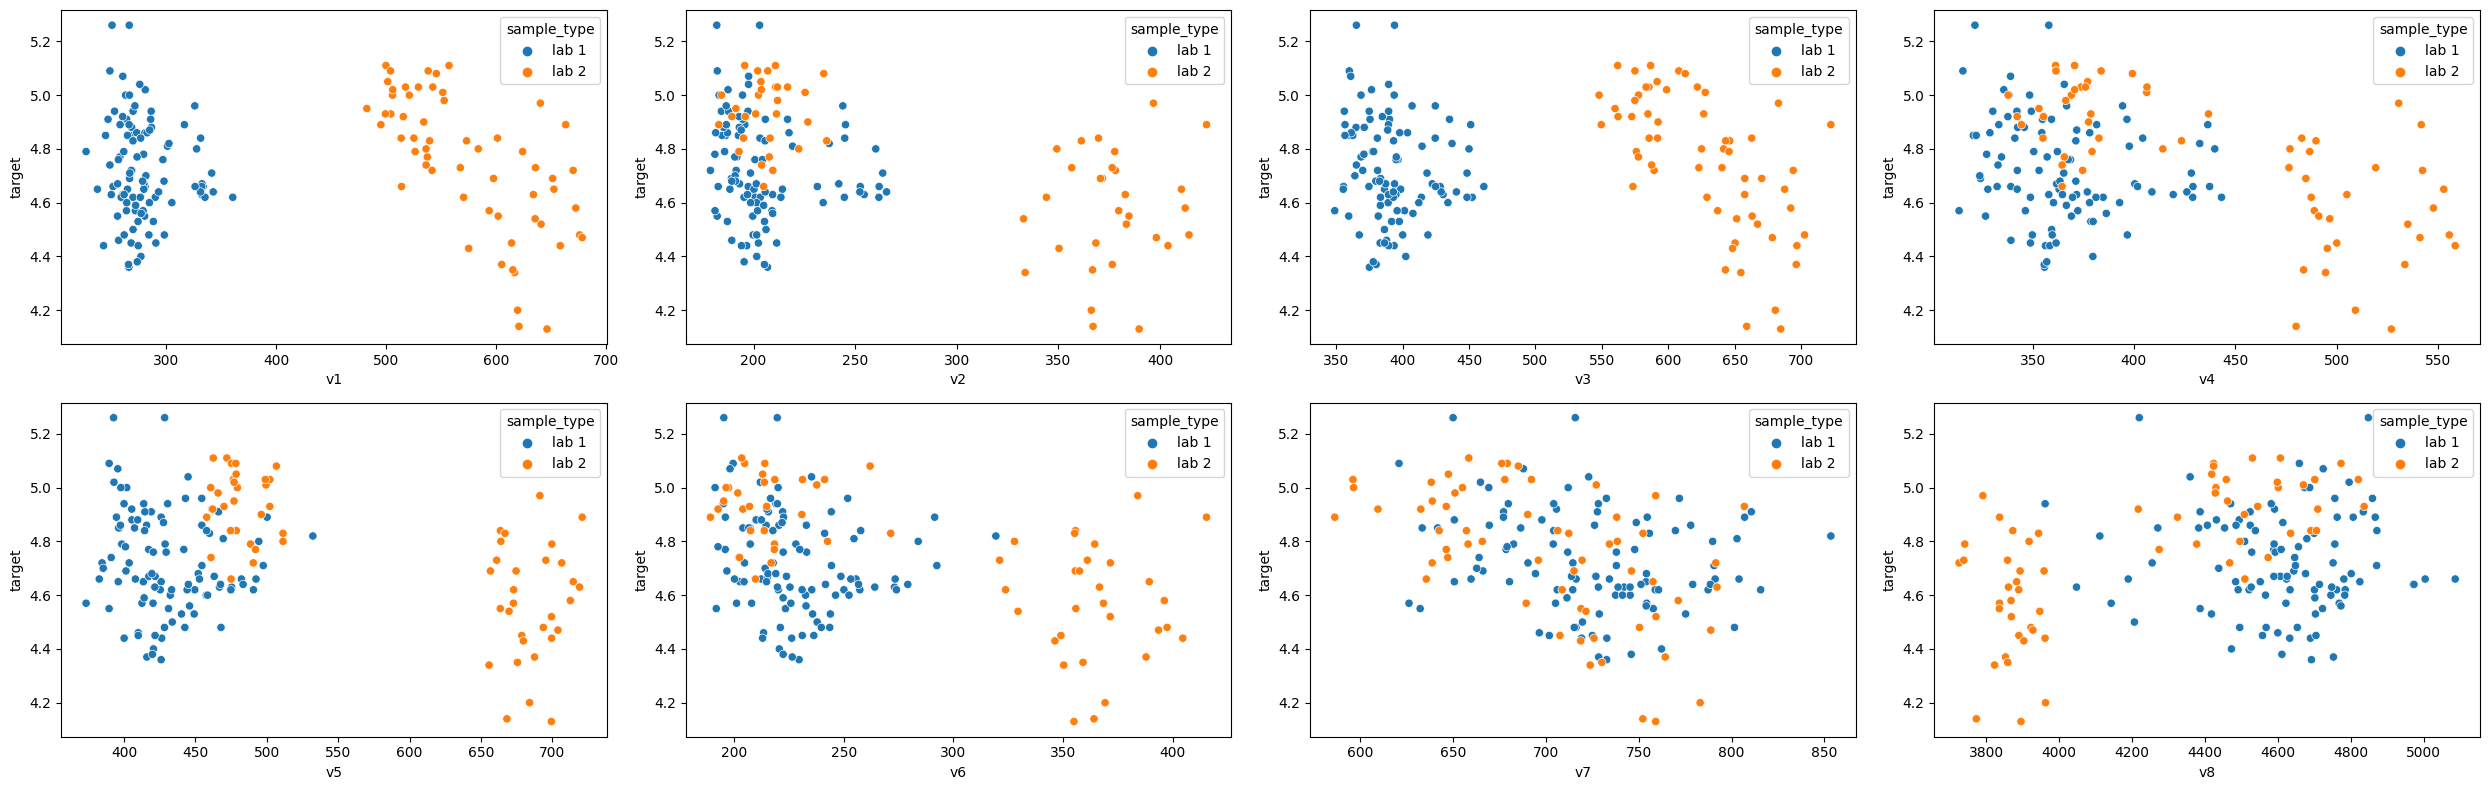

In [9]:
# Membuat figur boxplot dan distribution plot untuk visualisasi
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25,8))

n = 0
m = 0
for i in data.iloc[:,1:5].columns:
    sns.scatterplot(data, x=i, y='target', hue='sample_type', ax=axes[0][n]) 
    n = n+1
for col in data.iloc[:,5:9].columns:
    sns.scatterplot(data, x=col, y='target', hue='sample_type', ax=axes[1][m]) 
    m = m+1
plt.tight_layout()
plt.show()


Dari scatter plot diatas dapat dilihat bahwa : walaupun variabelnya sama, distribusi persebaran data adalah berbeda pada tipe sample yang berbeda (contoh: v1 berbeda nilainya dari lab 1 maupun lab 2)

Singkatnya variabel bisa dikategorikan menjadi 4 kategori :

- Grup 1 (v1, v3) = nilai variabelnya jelas berbeda pada tipe sample yang berbeda. Secara visual pun, v1 dan v3 memiliki korelasi yang cukup tinggi.

- Grup 2 (v2,v4,v5,v6)  = nilai variabelnya masih bisa dibedakan pada masing masing tipe sampel (lab 1 dan lab 2) namun masuk terlihat terpisah. Juga secara visual pada scatterplot, variabel-variabel ini terlihat memiliki korelasi yang cukup tinggi.

- Grup 3 (v7) = nilai data pada v7 ini tersebar secara merata, independen terhadap sample_type. DIstribusi valuenya cenderung lebih tinggi dari v1 s/d v6.

- Grup 4 (v8) = adalah variabel yang paling berbeda. Tidak hanya valuenya yang jauh lebih tinggi. Distrbusi nya pun serupa dengan Grup 2 hanya saja berbanding terbalik.

### Analisa Perilaku Variabel 

In [10]:
data.head(2)

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.6,199.0,391.333333,371.733333,466.8,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.2,194.6,393.666667,348.533333,401.8,220.066667,712.000000,4673.466667,lab 1


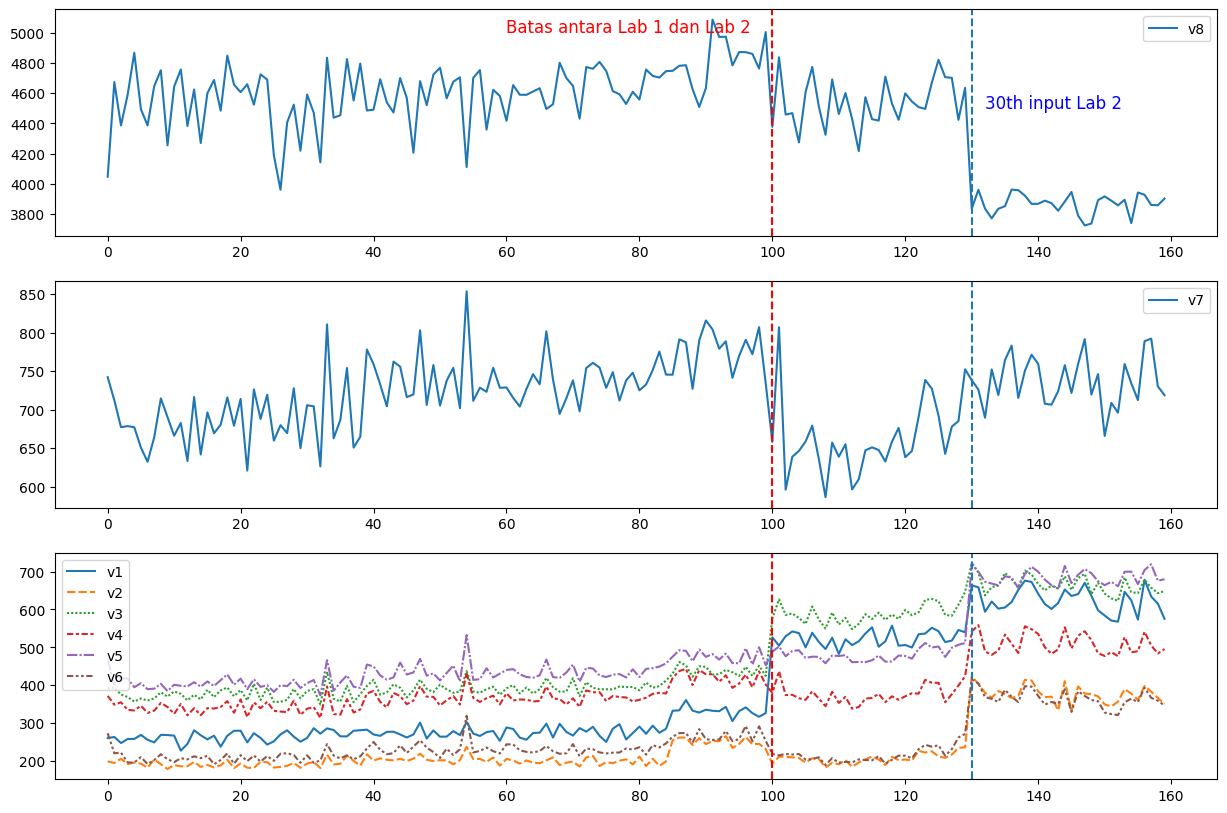

In [11]:
# plotting data berdasarkan nilai variabel
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))
sns.lineplot(data.iloc[:,8:9], ax=ax1, ls='--')
ax1.axvline(100, c='r', ls='--')
ax1.axvline(130, ls='--')
ax1.text(60,5000,'Batas antara Lab 1 dan Lab 2', c='r', fontsize=12)
ax1.text(132,4500,'30th input Lab 2', c='b', fontsize=12)

sns.lineplot(data.iloc[:,7:8], ax=ax2, ls='--')
ax2.axvline(100, c='r', ls='--')
ax2.axvline(130, ls='--')
#ax2.text(70,800,'Batas antara Lab 1 dan Lab 2', c='r', fontsize=9)

sns.lineplot(data.iloc[:,1:7], ax=ax3)
ax3.axvline(100, c='r', ls='--')
ax3.axvline(130, ls='--')
#ax3.text(70,600,'Batas antara Lab 1 dan Lab 2', c='r', fontsize=9)



In [12]:
# data uinput ke 30 pada lab 2
data.iloc[128:132,:]

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
128,5.08,545.750000,234.5625,612.6875,399.250000,506.687500,262.0000,685.125000,4423.812500,lab 2
129,4.83,539.666667,236.0000,646.2000,423.466667,511.333333,271.4000,752.266667,4634.933333,lab 2
130,4.89,663.375000,422.8125,722.3125,541.750000,721.000000,415.3750,738.125000,3836.812500,lab 2
131,4.44,658.437500,403.8750,696.7500,558.500000,699.562500,404.5625,725.875000,3961.437500,lab 2


Ada kenaikan pada data input ke-30 pada sample tipe lab 2

In [13]:
# membuat rata rata value 
mean_df = pd.DataFrame()
variabel = []
mean_lab_1 = []
mean_lab_2 = []

for i in data_lab2.iloc[:,1:9].columns:
    variabel.append(i)

for i in data_lab1.iloc[:,1:9].columns:
    mean_lab_1.append(data_lab1[i].mean())
    
for i in data_lab2.iloc[:,1:9].columns:
    mean_lab_2.append(data_lab2[i].mean())

mean_df['variabel'] = variabel
mean_df['mean_lab_1'] = mean_lab_1
mean_df['mean_lab_2'] = mean_lab_2
mean_df['change_percentage'] = (mean_df.mean_lab_2 - mean_df.mean_lab_1)/mean_df.mean_lab_1*100

mean_df

,variabel,mean_lab_1,mean_lab_2,change_percentage
0,v1,279.510776,573.861872,105.309391
1,v2,204.956117,291.586944,42.267988
2,v3,392.767375,626.915819,59.615044
3,v4,364.830706,442.907815,21.400915
4,v5,429.751532,583.258166,35.719857
5,v6,228.122440,290.331453,27.270010
6,v7,723.852851,699.546385,-3.357929
7,v8,4608.483351,4204.296371,-8.770499


Pertama jika dilihat secara visual terdapat perbedaan perilaku value dari seluruh vriabel pada tipe sample atau lab yang berbeda. Rata-rata nilai v1 s/d v6 mengalami kenaikan yang cukup signifikan terutama v1 yang perbedaannya sampai 2x lipat.

Yang menarik lagi dari data yang didapatkan adalah adanya perubahan value variabel pada jenis sample lab 2, dimana ada trend ada loncatan pada input data ke 30 pada lab 2. Dimana variabel v1-v7 mengalami kenaikan nilai, sedangkan v8 mengalami penurunan yang signifikan.


## Feature Engineering

### Dulicate Data Check

In [14]:
# cek apakah ada data duplikat
duplicate = data[data.duplicated()]
print("Duplicate Rows :", duplicate)

Duplicate Rows : Empty DataFrame
Columns: [target, v1, v2, v3, v4, v5, v6, v7, v8, sample_type]
Index: []


### Splitting Train Test Data

In [15]:
# splitting the data ke variabel dan target
X = data.drop(['target'], axis=1)
y = data.drop(data.columns[data.columns!='target'],axis=1)

y.head(2)

,target
0,4.63
1,5.00


In [16]:
# Split Train-Set and Test-Set

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train.head(3)

Train Size :  (128, 9)
Test Size  :  (32, 9)


,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
70,267.000,198.5000,418.3750,365.3750,454.5000,244.3750,737.9375,4648.250,lab 1
139,672.500,412.3125,692.1250,547.7500,712.6875,396.1250,771.2500,3868.125,lab 2
29,250.875,181.9375,365.1875,321.5625,392.6250,195.3125,650.0000,4219.875,lab 1


In [17]:
# Pemilihan Kolom categorical dan numerical

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Cat Columns :  ['sample_type']


In [18]:
# Split Train-Set and Test-Set based on Column Types
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num.head(3)

,v1,v2,v3,v4,v5,v6,v7,v8
70,267.000,198.5000,418.3750,365.3750,454.5000,244.3750,737.9375,4648.250
139,672.500,412.3125,692.1250,547.7500,712.6875,396.1250,771.2500,3868.125
29,250.875,181.9375,365.1875,321.5625,392.6250,195.3125,650.0000,4219.875


### Null Values Checking

In [19]:
# cek null values
def cek_null(dataframe):
    for col in dataframe.columns:
        null_val = dataframe[col].isnull().sum()
        if null_val > 0:
            print(f'{col} column memiliki {null_val} null values')

In [20]:
print(cek_null(X_train))
print(cek_null(X_test))
print(cek_null(y_train))
print(cek_null(y_test))

None
None
None
None


Tidak ada null values pada Dataframe train, test maupun target

## Outlier Detection

<AxesSubplot: ylabel='v8'>

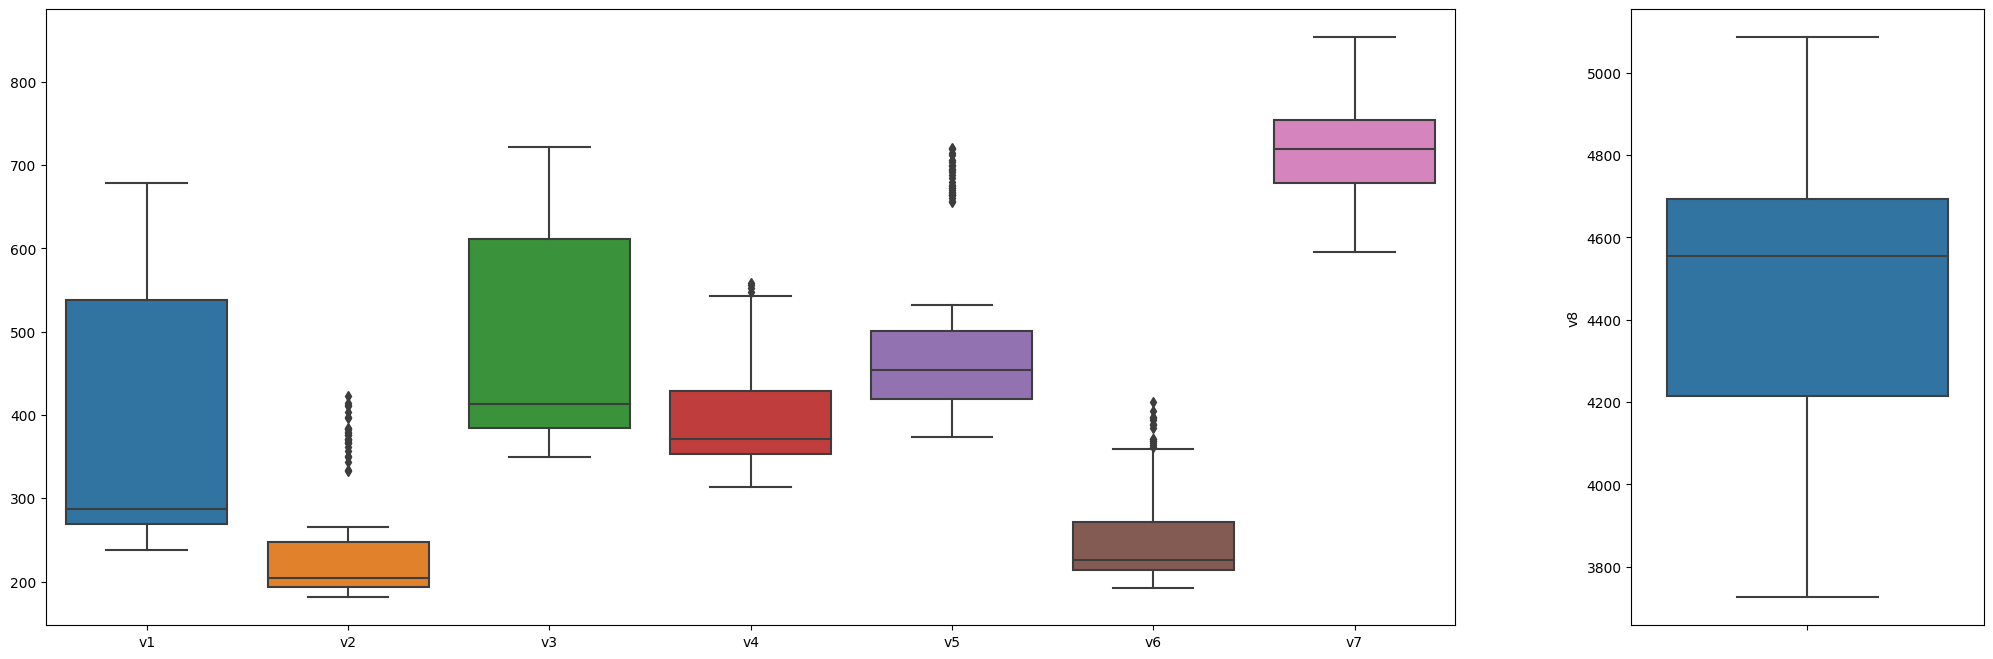

In [21]:
# Membuat figur boxplot untuk outlier detection

fig = plt.figure(figsize=(25,8))
gs = GridSpec(1, 2, figure=fig, width_ratios=[4, 1])

ax1 = fig.add_subplot(gs[:, 0])
sns.boxplot(X_train_num.drop('v8',axis=1), ax=ax1)

ax2 = fig.add_subplot(gs[:, 1])
sns.boxplot(data =X_train_num, y='v8', ax=ax2)


Tidak ada single value yang dianggap ekstrim yang dikategorikan sebagai outlier pada dataset Train, jika plot diluar boxplot ditrim atau dilakukan outlier handling ada resiko kehilangan data yang justru penting menginat jumlah data yang tentu tidak terlalu banyak

### Feature Scalling Kolom Nunmerik 

Melakukan feature scalling untuk nantinya setelah proses pemilihan feature. dimmasukkan kedalam model.

In [22]:
# checking kalau data skew
for i in X_train_num.columns:
    print(f' skewness from column {i} is : {round(X_train_num[i].skew(),3)}' )

 skewness from column v1 is : 0.61
 skewness from column v2 is : 1.332
 skewness from column v3 is : 0.571
 skewness from column v4 is : 1.039
 skewness from column v5 is : 1.137
 skewness from column v6 is : 1.205
 skewness from column v7 is : -0.116
 skewness from column v8 is : -0.694


Karena train data tidak ada yang skew eksrim dan beberapa kolom bahkan merupakan distribusi normal (Gaussian) maka diputuskan untuk melakukan feature scaling dengan StandardScaler

In [23]:
## dilakukan scalling dengan standard scaller
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_num_sc = scaler.fit_transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)
X_train_num_sc


array([[-0.83120513, -0.5808678 , -0.5359285 , ..., -0.16480408,
         0.41756305,  0.60500713],
       [ 1.842378  ,  2.35103307,  1.71445188, ...,  2.27768379,
         1.06793722, -1.67284166],
       [-0.93752209, -0.80798085, -0.97315994, ..., -0.95448817,
        -1.29927833, -0.64578406],
       ...,
       [ 1.37755035,  1.97193997,  1.47557589, ...,  1.62863388,
         0.04653659, -1.76664187],
       [ 1.4760103 ,  1.27168903,  1.40597508, ...,  1.53957227,
         0.14285216, -1.80459994],
       [ 0.8447293 , -0.52687489,  0.7726831 , ..., -0.91927932,
        -1.20044098,  0.46759164]])

### Encoding Categorical Columns

Dilakukan encoding untuk melihat korelasi antara kolom sample_type dengan kolom target juga apabila terpilih bisa langsung dimasukkan kedalam model

Encoding menggunakan pd.get_dummies


In [24]:
X_train_cat_dum = pd.get_dummies(X_train['sample_type'])
X_test_cat_dum = pd.get_dummies(X_test['sample_type'])
X_test_cat_dum.head(2)

,lab 1,lab 2
128,0,1
75,1,0


## Feature Selection

Pada fase ini akan dipilih mana saja feature atau variabel yang penting untuk menetukan prediksi pada modelling, dilakukan dengan pertama memilih fitur numerik dan lalu kategorical

<AxesSubplot: >

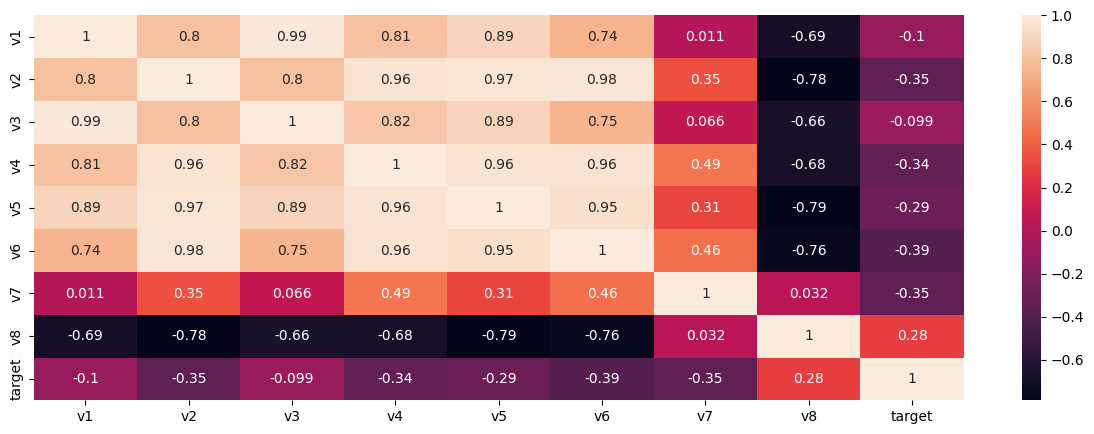

In [25]:
# korealsi antara kolom numerik denghan kolom target
correlation_num = pd.concat([X_train_num,y_train], axis=1)
plt.figure(figsize=(15,5))
sns.heatmap(correlation_num.corr(),annot=True)

[0.07001238 0.10122175 0.08339331 0.0932923  0.16612685 0.18463583
 0.15421511 0.14710248]


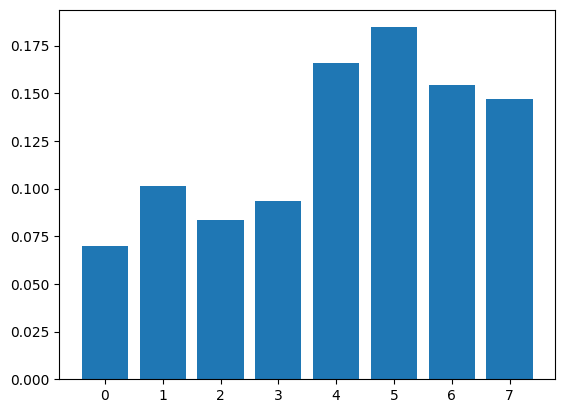

In [26]:
# melakukan feature importance untuk menentukan variabel yang digunakan
from xgboost import XGBRegressor


ft = XGBRegressor()
ft.fit(X_train_num, y_train)
# feature importance
print(ft.feature_importances_)
# plot
plt.bar(range(len(ft.feature_importances_)), ft.feature_importances_)
plt.show()

Syarat untuk memilih feature adalah melihat korelasi antara fitur valriabel dan target, lalu korelasi antara sesama fitur variabel.

Pada plot pearson corrleation matrix diatas, didapatkan bahwa hampir seluruh kolom memiliki korelasi yang cukup tinggi yang mempengaruhi nilai target.

Namun perlu diingat jika memasukkan fitur-fitur variabel dimana korelasi dengan sesamanya tinggi, fitur-fitur yang berkorelasi dapat menyebabkan ketidakstabilan dalam model dan nantinya menyulitkan untuk menginterpretasikan kontribusi setiap fitur pada output model.

Contohnya pada kasus ini, v1 dan v3 memiliki korelasi yang hampir sempurna, v2, v4, v5 dan v6 juga memiliki korelasi antar sesama yang tinggi. Sedangkan v7 dan v8 merupakan fitur variabel yang independen terhadap fitur lain. 

Oleh karena itu akan dipilih hanya kolom ``v3, v6, v7 dan v8`` dari hasil fitur importance yang tinggi dari masing masing grup

Note: 

- Hasil ini sesuai dengan apa yang telah ditelaah pada bagian EDA Notebook

<AxesSubplot: >

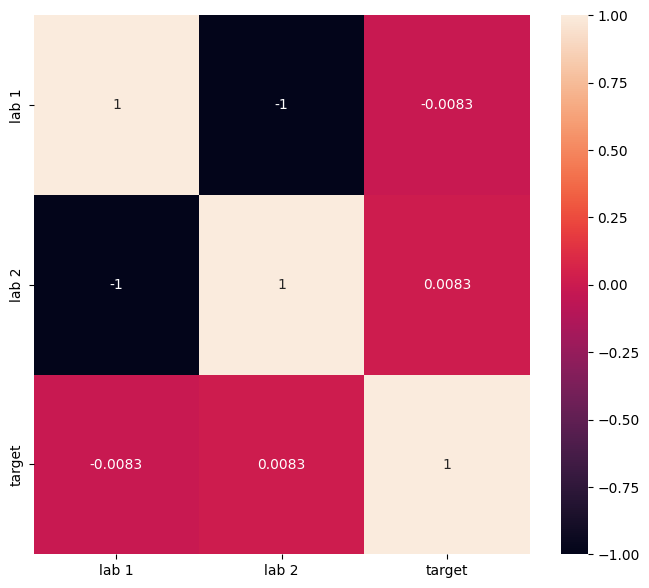

In [27]:
# membuat korelasi antara sample_type dengan kolom target
correlation_cat = pd.concat([X_train_cat_dum,data['target']], axis=1)
plt.figure(figsize=(8,7))
sns.heatmap(correlation_cat.corr(),annot=True)

Terlihat dari korelasi antara tipe sample dan target sangat kecil, oleh karena itu sample_type tidak akan dimasukkan kedalam pemodelan.

DIlanjutkan setelah memilih fiture dengan menggabungakan fitur (Concatenating)

In [28]:
#Creating dataframe of scaled column only
X_train_num_sc_df = pd.DataFrame(X_train_num_sc, columns=X_train_num.columns, index=X_train_num.index)
X_test_num_sc_df   = pd.DataFrame(X_test_num_sc,  columns=X_train_num.columns, index=X_test_num.index)


In [29]:
# concatting scaled and encoded labels
df_train_sc = pd.concat([X_train_num_sc_df,X_train_cat_dum], axis=1)
df_test_sc = pd.concat([X_test_num_sc_df,X_test_cat_dum], axis=1)

df_test_sc.head(2)

,v1,v2,v3,v4,v5,v6,v7,v8,lab 1,lab 2
128,1.006677,-0.086361,1.061431,0.035334,0.136542,0.118879,-0.613518,-0.050317,0,1
75,-0.942055,-0.601437,-0.774325,-0.591202,-0.677203,-0.561155,0.228430,0.894255,1,0


In [30]:
# Selecting final Features
df_train_finale = df_train_sc.loc[:,['v3','v6','v7','v8']]
df_test_finale = df_test_sc.loc[:,['v3','v6','v7','v8']]

num_columns_finale = df_train_finale.columns.tolist()
cat_columns_finale = ['sample_type']

In [31]:
# checking the distribution of X train and X test due to labs difference
print(X_train[X_train.sample_type=='lab 1'].shape)
print(X_train[X_train.sample_type=='lab 2'].shape)
print(X_test[X_test.sample_type=='lab 1'].shape)
print(X_test[X_test.sample_type=='lab 2'].shape)

(79, 9)
(49, 9)
(21, 9)
(11, 9)


## Model Definition

Sekarang masuk kedalam fase modelling

Pada case ini ada beberapa model yang akan diajukan oleh penulis untuk sekiranya dapat menyesuaikan dengan karakteristik dataset yaitu lemah atau tidak adanya pola linear:

Support Vector Machine (SVM), Random Forest, Decission Tree and KN Neighbor dataset.

In [32]:
svr = SVR()
lin_reg = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()

models_list = [svr,lin_reg,dt,rf,knn]

## Model Training

In [33]:
# mmenggunakan loop
# masukkan model ke dictionry
models = {'Linear Regression': LinearRegression(),
          'SVM': SVR(),
          'Decission Tree': DecisionTreeRegressor(),
          'Random Forest': RandomForestRegressor(), 
           'KNN Model' : KNeighborsRegressor()
          }


# Fit dan  predict dengan each model
for model_name, model in models.items():

    model.fit(df_train_finale, y_train) 

Diterapkan Gridsearch CV untuk mencari parameter terbaik berdasarkan performa yang dilakukan dengan cross validation pada train set. Yang mana nantinya parameter terbaik ini akan dimasukkan kedalam model.

Tidak seperti RandomSearch, GridSearchCV menjamin mendapatkan parameter terbaik dengan mencoba semua kombinasi parameter yang disediakan, walaupun di satu sisi computational costnya lebih besar.



In [34]:
# Define the parameter 
svr_param_grid = {
    'kernel':['rbf','linear','sigmoid'],
    'C': [0.1,0.01,0.001,1,2,4,8,10,12,15,20],
    'epsilon': [0.1, 0.2, 0.5, 1,2,4,8,10],
}

dt_param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
}

rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
}

linear_param_grid = {
    'fit_intercept': [True, False]
}

knn_param_grid = {'n_neighbors': np.arange(1,25,1),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']
}

# Define the GridSearchCV
svr_cv = GridSearchCV(svr, svr_param_grid, cv=5)
dt_cv = GridSearchCV(dt, dt_param_grid, cv=5)
rf_cv = GridSearchCV(rf, rf_param_grid, cv=5)
linear_cv = GridSearchCV(lin_reg, linear_param_grid, cv=5)
knn_cv = GridSearchCV(knn, knn_param_grid, cv=5)


# Fit the GridSearchCVto the data
svr_cv.fit(df_train_finale, y_train)
dt_cv.fit(df_train_finale, y_train)
rf_cv.fit(df_train_finale, y_train)
linear_cv.fit(df_train_finale, y_train)
knn_cv.fit(df_train_finale,y_train)

# Get the best hyperparameters 
best_svr_params = svr_cv.best_params_
best_dt_params = dt_cv.best_params_
best_rf_params = rf_cv.best_params_
best_linear_params = linear_cv.best_params_
best_knn_params = knn_cv.best_params_

# Build themodels with the best hyperparameters
best_svr_model = SVR(**best_svr_params)
best_dt_model = DecisionTreeRegressor(random_state=30, **best_dt_params)
best_rf_model = RandomForestRegressor(random_state=30, **best_rf_params)
best_linear_model = LinearRegression(**best_linear_params)
best_knn_model = KNeighborsRegressor(**best_knn_params)


# Fit the best model feom GridsearchCV best params
best_svr_model.fit(df_train_finale, y_train)
best_dt_model.fit(df_train_finale, y_train)
best_rf_model.fit(df_train_finale, y_train)
best_linear_model.fit(df_train_finale, y_train)
best_knn_model.fit(df_train_finale, y_train)


KNeighborsRegressor(metric='euclidean', n_neighbors=20)

## Evaluation 

In [35]:
# mmenggunakan loop untuk mengetahui performa pada test set

models_list_tuned = [best_svr_model,best_linear_model,best_dt_model,best_rf_model,best_knn_model]

# membuat loop metrics report
for model in models_list_tuned:
    
    y_pred = model.predict(df_test_finale)
    
    print(model, 'MAE:', mean_absolute_error(y_test, y_pred))
    print(model, 'MSE:', mean_squared_error(y_test, y_pred))
    print(model, 'RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print(model, 'R2 score:', r2_score(y_test, y_pred))
    print('')

SVR(C=0.1) MAE: 0.1326906843471375
SVR(C=0.1) MSE: 0.026109838380385372
SVR(C=0.1) RMSE: 0.1615853903680199
SVR(C=0.1) R2 score: 0.4355344656184893

LinearRegression() MAE: 0.13599771983486325
LinearRegression() MSE: 0.028249075448562828
LinearRegression() RMSE: 0.1680746127425639
LinearRegression() R2 score: 0.38928655028230474

DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, min_samples_split=8,
                      random_state=30) MAE: 0.15372395833333322
DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, min_samples_split=8,
                      random_state=30) MSE: 0.03285262862378749
DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, min_samples_split=8,
                      random_state=30) RMSE: 0.18125294100727715
DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, min_samples_split=8,
                      random_state=30) R2 score: 0.2897628739864373

RandomForestRegressor(max_depth=3, min_samples_leaf=4, n_estimators=50,
                      random_s

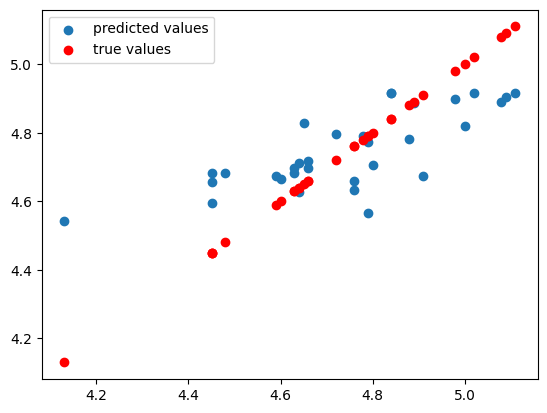

In [36]:
# Plotting the best KNN prediction
y_pred_best = best_knn_model.predict(df_test_finale)

plt.scatter(y_test, y_pred_best, label= 'predicted values')
plt.scatter(y_test, y_test, color='red', label='true values')

plt.legend()
plt.show()

Pada plot diatas dapat dilihat perbandingan distribusi antara target prediksi dan target asli

In [37]:
# membuat dataframe hasil perdiksi dan true value (target)
df_prediction = y_test.copy()
df_prediction['predicted']= y_pred_best
df_prediction.index=np.arange(len(df_prediction))
df_prediction['predicted'] = round(df_prediction['predicted'], 2)
df_prediction['difference'] = df_prediction.target - df_prediction.predicted

df_prediction['error_percentage'] = df_prediction.difference /df_prediction.target*100
df_prediction['error_percentage'] = round(df_prediction.error_percentage,2)
df_prediction['error_percentage'] = abs(df_prediction.error_percentage)

df_prediction.head(10)

,target,predicted,difference,error_percentage
0,5.08,4.89,0.19,3.74
1,4.63,4.68,-0.05,1.08
2,4.48,4.68,-0.20,4.46
3,5.00,4.82,0.18,3.60
4,4.13,4.54,-0.41,9.93
5,4.98,4.90,0.08,1.61
6,4.64,4.63,0.01,0.22
7,4.84,4.92,-0.08,1.65
8,5.11,4.92,0.19,3.72
9,5.02,4.92,0.10,1.99


In [38]:
# hitung rata rata error
print('Rata-rata error pada prediksi                :',round(abs(df_prediction.difference).mean(),3),'poin')
print('Rata-rata presentase error pada prediksi     :',round(df_prediction.error_percentage.mean(),3),'%')

Rata-rata error pada prediksi                : 0.122 poin
Rata-rata presentase error pada prediksi     : 2.602 %


Terlihat dari visualisasi diatas perbandingan value yang diprediksi dengan value yang asli pada test data.

Melihat karakteristik data, penulis yakin jika model ini cukup baik dalam memprediksi data yang baru. 

Telihat juga dari tabel dataframe, nilai presentase error adalah ``2,6%`` dari target.

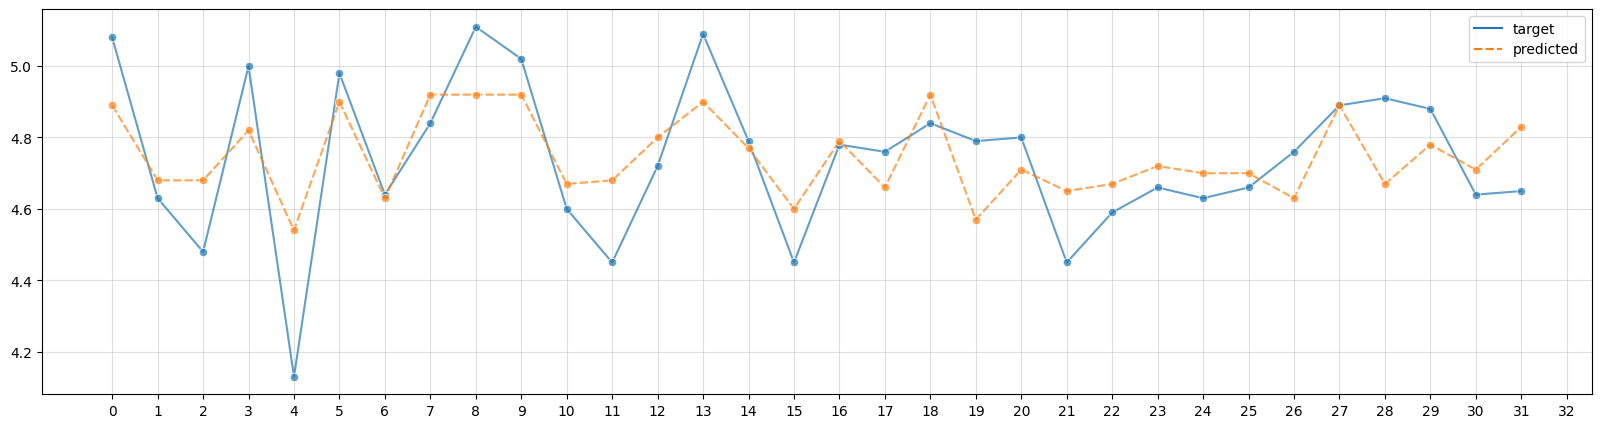

In [39]:
fig = plt.figure(figsize=(20,5))
sns.lineplot(data=df_prediction.loc[:,['target', 'predicted']], marker='o', alpha=0.7)
plt.xticks(np.arange(0, 33, 1))
plt.grid(True, alpha=0.4)


plot diatas agar terlihat distribusi dari hasil prediksi dibandingkan dengan target asli nutrisi tanaman.

Terlihat bahwa model sudah cukup baik dalam melihat pola dari dataset.

## Conclussion & Reccomendation

`CONCLUSSION`

Pada hasil analisa yang telah dilakukan, terdapat beberapa poin kesimpulan dan hipotesa yang didapatkan:

1. Dataset

- Berhubungan dengan dataset, terdapat 8 kolom variabel dengan 1 kolom sample_type, dan 1 kolom numerik target yang mana nilainya harus diprediksi menggunakan variabel lain.

- Setelah dilakukan visualisasi pada masing masing data variabel, terlihat bahwa variabel dapat dibagi menjadi 4 grup dengan masing masing karakteristik distribusinya.

- value dari 1 variabel bisa berbeda dilihat dari jenis sample nya (lab 1 dan lab 2)

- Persebaran dataset cenderung random dan tidak memiliki pola linear yang secara visual dapat ditentukan.

.

2. Modelling & Evaluation

- Oleh karena itu dalam kasus ini, tidak dapat secara langsung dipastikan tanpa adanya test untuk memilih model apa yang paling cocok untuk diimplementasikan.

- Walaupun demikian, penuilis menyiapkan beberapa alternatif yang memiliki karakterisik yang dapat dugunakan untuk mengolah data dan mencari pola yang tepat.

- Linear Regression pada bentuk default dirasa akan kurang tepat, karena data terlihat bukan tipe data berpola linear. Namun ini akan dijadikan pembanding untuk model lainnya

- Pemodelan dilakukan dengan dibantu oleh Grid Search CV untuk memilih parameter yang paling tepat berdasarkan hasil Cross Validation pada train set. Lalu hasil penemuan parameter dari proses ini akan di test pada test set yang telah disiapkan pada fase terakhir.

- Hasil dari prediksi pada test set lalu dievaluasi dengan metrics yang tersedia, dantara lain : MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error) dan R-Squared.

- Pada case kali ini, penulis akan menggunakan metric utama MAE karena penulis ingin tau rata-rata magnitude dari error pada prediksi dan karena distribusi data cenderung tidak memiliki pola yang jelas. Lalu metrics lain akan dikolaborasikan dengan MAE agar membuat analisis performa model semakin solid.

. 

3. Result

Dapat dilihat pada hasil evaluasi, model dengan performa terbaik pada data test adalah model KNN dengan parameter metric= euclidean dan jumlah neighbors 20. 

Dengan nilai ``MAE sebesar 0.122`` atau jika dibandingkan dengan skala target, ``maka rata-rata error pada setiap prediksi adalah sekitar 2,6 %``

Lalu model ini juga meraih nilai ``R-Squared`` tertinggi yaitu`` 0.51,`` yang berarti bahwa 51% variasi dari target data bisa 'ditangkap' oleh fitur variabel.

Dilihat dari magnitude error MSE dan RMSE, model KNN memiliki nilai yang relatif rendah yang berarti ini merupakan indikasi yang cukup baik.

Tentang KNN Model :

KNN merupakan algoritma machine learning yang cukup baik jiak digunakan untuk data yang tidak memiliki pola linear, yang mana model Linear Regression akan kurang baik performanya jika digunakan.

Selain itu tidak seperti model Lnear Regression yang dimana mengasumsikan data harus berbentuk pola linear, KNN membentuk fungsi sendiri dari trainingnya pada dataset dengan mengukur jarak dari titik data lalu digunakan untuk memprediksi data set.

Namun disisi lain terlepas dari kelebihannya yang fleksibel karena bisa membangun fungsi dan pola sendiri dari dataset, KNN memiliki kekurangan yaitu computational cost yang tinggi, karena KNN dapat mengingat seluruh train data untuk prediksi, dan semakin besar dataset, semakin besar pula computational costs nya. Inilah trade-off yang harus dibayar oleh model KNN. Tentu saja ini juga bergantung dari K-neighbors yang digunakan, semakin kompleks, semakin mahal.

``RECCOENDATION``



1. Dataset

- Jelas akan lebih baik jika data dikumpulkan semakin banyak sehingga pola akan terbaca lebih jelas, demi meingkatkan performa model.

- Diasumsikan variabel data adalah sama, akan lebih baik jika test lab dilakukan pada satu lab saja agar value data tidak berebda beda antar lab.


2. Model

- Perlu dilakukan explore lebih dalam dalam mencari parameter maupun model yang tepat agar dapat lebih lagi mengurangi error pada prediksi dataset.


## Model Saving

In [40]:
# menyimpan scaler terakhir
scaler_final = StandardScaler()
scaler_final.fit(X_train_num.loc[:,['v3','v6','v7','v8']])

StandardScaler()

In [41]:
# Save the Files

import pickle
import json


with open('model.pkl', 'wb') as file_1:
  pickle.dump(best_knn_model, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler_final, file_2)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns_finale, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns_finale, file_5)